In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
fname = '../data/130315_1A_genotypes.txt'
df_gt = pd.read_csv(fname, delimiter='\t', comment='#', header=[0, 1])
df_gt

,Genotype1,Genotype2,Genotype3
,WT 17,Het 34,Mut 22
0,2.0,1,4.0
1,14.0,3,11.0
2,18.0,5,12.0
3,24.0,6,13.0
4,28.0,8,20.0
5,29.0,10,21.0
6,30.0,15,23.0
7,54.0,19,27.0
8,58.0,22,35.0


In [68]:
df_gt.columns = df_gt.columns.get_level_values(1)
df_gt.columns = ['wt', 'het', 'mut']
df_gt

,wt,het,mut
0,2.0,1,4.0
1,14.0,3,11.0
2,18.0,5,12.0
3,24.0,6,13.0
4,28.0,8,20.0
5,29.0,10,21.0
6,30.0,15,23.0
7,54.0,19,27.0
8,58.0,22,35.0
9,61.0,33,39.0


In [69]:
df_gt = pd.melt(df_gt, var_name='genotype', value_name='fish')
df_gt

,genotype,fish
0,wt,2.0
1,wt,14.0
2,wt,18.0
3,wt,24.0
4,wt,28.0
5,wt,29.0
6,wt,30.0
7,wt,54.0
8,wt,58.0
9,wt,61.0


In [70]:
df_gt = df_gt.dropna()

In [71]:
df_gt = df_gt.reset_index(drop=True)

In [72]:
df_gt.loc[:,'fish'] = df_gt.loc[:, 'fish'].astype(int)
df_gt

,genotype,fish
0,wt,2
1,wt,14
2,wt,18
3,wt,24
4,wt,28
5,wt,29
6,wt,30
7,wt,54
8,wt,58
9,wt,61


In [73]:
fraw = '../data/130315_01_rawDATA.txt'
df = pd.read_csv(fraw, delimiter='\t', comment='#', header=[0, 1])
df.head()

,TIME(SECONDS),Unnamed: 1_level_0,FISH1,FISH2,FISH3,FISH4,FISH5,FISH6,FISH7,FISH8,...,FISH90,FISH91,FISH92,FISH93,FISH94,FISH95,FISH96,Unnamed: 98_level_0,Unnamed: 99_level_0,CLOCK
,start,end,middur,middur,middur,middur,middur,middur,middur,middur,...,middur,middur,middur,middur,middur,middur,middur,Unnamed: 98_level_1,Unnamed: 99_level_1,Unnamed: 100_level_1
0,0,60.0,0.6,1.4,0.0,0.0,0.0,0.0,0.0,1.7,...,0.0,0.0,0.0,0.0,0.0,0.0,20.1,NaN,NaN,9.519
1,60,120.0,1.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.2,NaN,NaN,9.536
2,120,180.0,1.9,0.0,0.0,1.5,0.1,0.0,0.0,0.0,...,0.0,0.0,23.5,0.0,0.3,0.0,18.7,NaN,NaN,9.553
3,180,240.0,13.4,0.0,0.0,4.5,0.0,0.0,0.0,0.0,...,0.0,0.0,29.0,0.0,0.4,0.0,15.9,NaN,NaN,9.569
4,240,300.0,15.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1,0.0,24.4,0.0,0.1,0.0,11.8,NaN,NaN,9.586


In [74]:
df.columns = list(df.columns.get_level_values(1)[:2]) \
                            + list(df.columns.get_level_values(0)[2:])
    
df.head()

,start,end,FISH1,FISH2,FISH3,FISH4,FISH5,FISH6,FISH7,FISH8,...,FISH90,FISH91,FISH92,FISH93,FISH94,FISH95,FISH96,Unnamed: 98_level_0,Unnamed: 99_level_0,CLOCK
0,0,60.0,0.6,1.4,0.0,0.0,0.0,0.0,0.0,1.7,...,0.0,0.0,0.0,0.0,0.0,0.0,20.1,NaN,NaN,9.519
1,60,120.0,1.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.2,NaN,NaN,9.536
2,120,180.0,1.9,0.0,0.0,1.5,0.1,0.0,0.0,0.0,...,0.0,0.0,23.5,0.0,0.3,0.0,18.7,NaN,NaN,9.553
3,180,240.0,13.4,0.0,0.0,4.5,0.0,0.0,0.0,0.0,...,0.0,0.0,29.0,0.0,0.4,0.0,15.9,NaN,NaN,9.569
4,240,300.0,15.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1,0.0,24.4,0.0,0.1,0.0,11.8,NaN,NaN,9.586


In [75]:
cols_to_drop = df.columns[df.columns.str.contains('Unnamed')]
df = df.drop(cols_to_drop, axis=1)

df.head()

,start,end,FISH1,FISH2,FISH3,FISH4,FISH5,FISH6,FISH7,FISH8,...,FISH88,FISH89,FISH90,FISH91,FISH92,FISH93,FISH94,FISH95,FISH96,CLOCK
0,0,60.0,0.6,1.4,0.0,0.0,0.0,0.0,0.0,1.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.1,9.519
1,60,120.0,1.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.2,9.536
2,120,180.0,1.9,0.0,0.0,1.5,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,23.5,0.0,0.3,0.0,18.7,9.553
3,180,240.0,13.4,0.0,0.0,4.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,29.0,0.0,0.4,0.0,15.9,9.569
4,240,300.0,15.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.1,0.0,24.4,0.0,0.1,0.0,11.8,9.586


In [76]:
df = df.drop(['start', 'end'], axis=1)

In [77]:
# Find columns to drop
cols_to_drop = []
for col in df.columns:
    if 'FISH' in col and int(col.lstrip('FISH')) not in df_gt['fish'].values:
            cols_to_drop.append(col)

# Drop 'em!
df = df.drop(cols_to_drop, axis=1)

df.head()

,FISH1,FISH2,FISH3,FISH4,FISH5,FISH6,FISH8,FISH10,FISH11,FISH12,...,FISH86,FISH87,FISH88,FISH89,FISH90,FISH92,FISH93,FISH95,FISH96,CLOCK
0,0.6,1.4,0.0,0.0,0.0,0.0,1.7,0.0,0.0,0.0,...,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.1,9.519
1,1.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.2,9.536
2,1.9,0.0,0.0,1.5,0.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,23.5,0.0,0.0,18.7,9.553
3,13.4,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,15.9,9.569
4,15.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.1,24.4,0.0,0.0,11.8,9.586


In [78]:
df['light'] = pd.Series(df.CLOCK < 14.0, index=df.index)
# Find where the lights switch from off to on. 
dark_to_light = np.where(np.diff(df['light'].astype(np.int)) == 1)[0]

# Initialize array with day numbers
day = np.zeros_like(df['light'], dtype=np.int)

# Loop through transitions to set days (+1 on indices b/c diff() is offset by 1)
for i in range(len(dark_to_light) - 1):
    day[dark_to_light[i]+1:dark_to_light[i+1]+1] = i + 1
day[dark_to_light[-1]+1:] = len(dark_to_light)

# Insert into DataFrame
df['day'] = pd.Series(day, index=df.index)
# Build ziet
zeit = 24.0 * df['day'] + df['CLOCK']

# Put in DataFrame
df['zeit'] = pd.Series(zeit, index=df.index)

df.head()

,FISH1,FISH2,FISH3,FISH4,FISH5,FISH6,FISH8,FISH10,FISH11,FISH12,...,FISH89,FISH90,FISH92,FISH93,FISH95,FISH96,CLOCK,light,day,zeit
0,0.6,1.4,0.0,0.0,0.0,0.0,1.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20.1,9.519,True,0,9.519
1,1.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,21.2,9.536,True,0,9.536
2,1.9,0.0,0.0,1.5,0.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,23.5,0.0,0.0,18.7,9.553,True,0,9.553
3,13.4,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,29.0,0.0,0.0,15.9,9.569,True,0,9.569
4,15.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.1,24.4,0.0,0.0,11.8,9.586,True,0,9.586


In [79]:
# Build list of genotypes
genotypes = []

# Check each column, put None for non-FISH column
for col in df.columns:
    if 'FISH' in col:
        fish_id = int(col.lstrip('FISH'))
        genotypes.append(df_gt.genotype[df_gt.fish==fish_id].iloc[0])
    else:
        genotypes.append(None)

In [80]:
df.columns = pd.MultiIndex.from_arrays((genotypes, df.columns), 
                                        names=['genotype', 'variable'])

In [81]:
# Value variables are the ones with FISH
col_1 = df.columns.get_level_values(1)
value_vars = list(df.columns[col_1.str.contains('FISH')])

# ID vars are the non-FISH entries
id_vars = list(df.columns[~col_1.str.contains('FISH')])

# Perform the melt
df1 = pd.melt(df, value_vars=value_vars, id_vars=id_vars, value_name='activity',
              var_name=['genotype', 'fish'])
# Rename any column that is a tuple
for col in df1.columns:
    if type(col) is tuple:
        df1.rename(columns={col: col[1]}, inplace=True)
        

In [82]:
df1 = df1[['fish', 'genotype', 'day', 'light', 'CLOCK', 'zeit', 'activity']]
df1.head()

,fish,genotype,day,light,CLOCK,zeit,activity
0,FISH1,het,0,True,9.519,9.519,0.6
1,FISH1,het,0,True,9.536,9.536,1.9
2,FISH1,het,0,True,9.553,9.553,1.9
3,FISH1,het,0,True,9.569,9.569,13.4
4,FISH1,het,0,True,9.586,9.586,15.4


In [83]:
def fish_to_number(fish_str):
    return int(fish_str.lstrip('FISH'))

# Apply the function to each entry in the fish column
df1['fish'] = df1['fish'].apply(fish_to_number)

# Look at the DataFrame
df1

,fish,genotype,day,light,CLOCK,zeit,activity
0,1,het,0,True,9.519,9.519,0.6
1,1,het,0,True,9.536,9.536,1.9
2,1,het,0,True,9.553,9.553,1.9
3,1,het,0,True,9.569,9.569,13.4
4,1,het,0,True,9.586,9.586,15.4
5,1,het,0,True,9.603,9.603,12.7
6,1,het,0,True,9.619,9.619,11.4
7,1,het,0,True,9.636,9.636,11.6
8,1,het,0,True,9.652,9.652,8.4
9,1,het,0,True,9.669,9.669,3.2


In [84]:
df2 = df.copy()
df2.head()
# Zero-level columns
cols = [col.replace('FISH', 'activity_') \
                    for col in df2.columns.get_level_values('variable')]

# Rename columns
df2.columns = pd.MultiIndex.from_arrays(
        [df2.columns.get_level_values('genotype'), cols], 
        names=['genotype', 'variable'])
# Pull out wild type cross-section
df_wt = df2.xs('wt', level='genotype', axis=1)

# Look at it
df_wt.head()

variable,activity_2,activity_14,activity_18,activity_24,activity_28,activity_29,activity_30,activity_54,activity_58,activity_61,activity_68,activity_75,activity_76,activity_78,activity_80,activity_86,activity_96
0,1.4,0.0,0.0,0.0,0.8,1.9,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.1,4.1,20.1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,21.2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2,0.1,0.0,0.1,0.0,18.7
3,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.9
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.4,0.0,0.0,11.8


In [85]:
df2.xs('zeit', level='variable', axis=1).head()
df2['wt'].head()

variable,activity_2,activity_14,activity_18,activity_24,activity_28,activity_29,activity_30,activity_54,activity_58,activity_61,activity_68,activity_75,activity_76,activity_78,activity_80,activity_86,activity_96
0,1.4,0.0,0.0,0.0,0.8,1.9,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.1,4.1,20.1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,21.2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2,0.1,0.0,0.1,0.0,18.7
3,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.9
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.4,0.0,0.0,11.8


In [86]:
df2.swaplevel('genotype', 'variable', axis=1)['zeit'].head()
df2.xs('zeit', level='variable', axis=1)[np.nan].head()


0    9.519
1    9.536
2    9.553
3    9.569
4    9.586
Name: nan, dtype: float64

In [87]:
df2

genotype        het         wt        het        mut        het             \
variable activity_1 activity_2 activity_3 activity_4 activity_5 activity_6   
0               0.6        1.4        0.0        0.0        0.0        0.0   
1               1.9        0.0        0.0        0.0        0.0        0.0   
2               1.9        0.0        0.0        1.5        0.1        0.0   
3              13.4        0.0        0.0        4.5        0.0        0.0   
4              15.4        0.0        0.0        0.0        0.0        0.0   
5              12.7        0.0        0.0        0.0        0.0        0.0   
6              11.4        0.0        0.0        0.0        0.0        0.0   
7              11.6        0.0        0.0        0.0        0.0        0.0   
8               8.4        0.0        0.6       22.8        0.0        0.0   
9               3.2        0.0        0.0       23.6        0.0        0.0   
10              1.3        0.0        0.2       21.0        0.0        0.0   
11              0.0        0.3        0.0       16.6        0.1        0.8   
12              0.0        0.0        0.0        5.1        0.1        0.2   
13              0.0        0.0        0.0        0.0        0.1        0.1   
14              0.0        0.0        0.0        0.0        0.1        0.3   
15              0.0        0.0        0.0        0.0        0.0        0.0   
16              0.0        0.1        0.0        0.0        0.1        0.2   
17              0.0        0.0        0.0        0.0        0.3        0.5   
18              0.0        0.0        0.0        0.0        0.0        0.0   
19              0.0        0.0        0.0        0.0        0.0        0.1   
20              0.0        0.0        0.1        0.0        0.0        0.0   
21              0.0        0.0        0.0        0.0        0.1        0.1   
22              0.0        0.0        0.0        0.0        0.1        0.1   
23              0.0        0.0        0.1        0.0        0.0        0.0   
24              0.0        0.0        0.1        0.0        0.8        0.1   
25              0.0        0.2        0.1        0.0        0.2        0.0   
26              0.0        0.6        0.1        0.0        0.0        0.0   
27              0.0        0.3        0.0        0.0        0.3        0.1   
28              0.0        2.4        0.0        0.0        0.1        0.0   
29              0.0        8.6        0.0        0.0        0.1        0.0   
...             ...        ...        ...        ...        ...        ...   
5333            7.7        6.5        0.3        3.8        3.9        1.1   
5334            6.7        6.6        6.2       10.0        3.3        1.4   
5335            1.7        4.0        1.4        3.9        2.0        4.3   
5336            2.0        6.6        3.7        9.5       11.5        3.4   
5337            1.6        6.8        1.3        4.3       10.2        0.8   
5338            2.3        6.3        8.2        2.7       13.3        3.4   
5339            3.9        5.7        3.9        1.8       11.2        3.2   
5340            3.9        1.1        5.2        2.2        5.3        5.0   
5341            0.8        6.7        7.8        3.7        9.3        1.5   
5342            1.7        4.8        7.3        9.4        5.1        0.0   
5343            7.1        4.7        1.0        9.5        5.4        0.0   
5344            2.3        4.8        8.0        1.5        5.3        2.5   
5345            0.1        7.1        4.8        0.0        2.5        6.7   
5346            2.9        8.9        6.4        2.0        5.1        3.9   
5347            4.6        1.0        0.6        1.1        4.9        5.6   
5348            0.5        7.6        4.1        0.6        6.2        1.2   
5349            1.1        8.7        2.9        8.1        4.3        0.3   
5350            0.6        5.5        3.1       12.5        4.0        0.0   
5351            2.8   

Fish 2 is wt


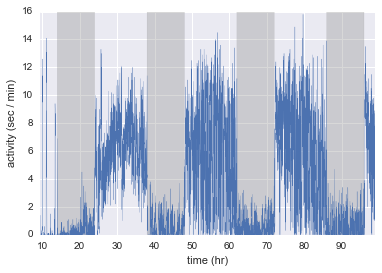

In [88]:
# Get view into DataFrame with only fish 2
df_fish = df1[df1['fish']==2]

# Get figure and axis objects using plt.subplots utility function
fig, ax = plt.subplots()

# Plot activity versus time for fish 2.  lw denotes the line width
ax.plot(df_fish.zeit, df_fish.activity, '-', lw=0.25)

# Set axis labels
ax.set_xlabel('time (hr)')
ax.set_ylabel('activity (sec / min)')

# Set axis limits
ax.set_xlim((df_fish.zeit.min(), df_fish.zeit.max()))
ax.set_ylim((0, ax.get_ylim()[1]))

# We can overlay day and night.  We'll make night shaded.
# The where keyword is useful, and ~df_wt.light means "not light."
ax.fill_between(df_fish.zeit, 0, ax.get_ylim()[1], where=~df_fish.light, 
                color='gray',  alpha=0.3)

print('Fish 2 is', df_fish.genotype.iloc[0])

In [89]:
def pretty_activity_plot(ax, selector, selection, col, df, xlabel='time (hr)', 
                         ylabel='activity (sec / min)', lw=0.25, 
                         color=None):
    """
    Makes a pretty plot of sleep traces.  Generates the plot on axes ax,
    and then returns the updated ax.
    """
    # Make sure selection input is iterable
    if type(selection) in [str, int, float]:
        selection = [selection]
        
    # Plot time traces of column col for each fish
    for sel in selection:
        # Pull out record of interest
        df_plot = df[df[selector]==sel]

        # Generate plot
        if color is None:
            ax.plot(df_plot.zeit, df_plot[col], '-', lw=lw)
        else:
            ax.plot(df_plot.zeit, df_plot[col], '-', lw=lw, color=color)

    # Label axes
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Set axis limits
    ax.set_xlim((df_plot.zeit.min(), df_plot.zeit.max()))
    ax.set_ylim((0.0, ax.get_ylim()[1]))
    
    # Overlay night shading
    ax.fill_between(df_plot.zeit, 0.0, ax.get_ylim()[1], 
                    where=~df_plot.light, color='gray', alpha=0.3, zorder=0)    
    
    return ax

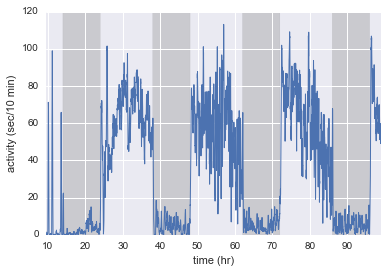

In [90]:
# Perform the rolling sum and return it as a new DataFrame
time_win = 10  # in units of no. of indices to sum over, equal to min here

# Make GroupBy object
df_gb = df1.groupby('fish')['activity']

# Compute rolling sum (use .values so we don't have to deal with indices)
df1['window'] = df_gb.rolling(window=time_win).sum().values

# Plot the rolling summed data
fig, ax = plt.subplots()
ax = pretty_activity_plot(ax, 'fish', 2, 'window', df1, lw=1,
                          ylabel='activity (sec/10 min)')

In [91]:
# Time points/lightness
t = df1.zeit[df1.fish==df1.fish.unique()[0]]
light = df1.light[df1.fish==df1.fish.unique()[0]]

# Index for right edge of first averaging win. (ensure win. ends at lights out)
start_ind = time_win + np.where(np.diff(light.astype(int)))[0][0] % time_win

# The time points we want
times = np.sort(df1.zeit.unique())[start_ind::time_win]

# The indicies of the tidy DataFrame we want
inds = df1.zeit.isin(times)

# New DataFrame
new_cols = ['fish', 'genotype', 'day', 'light', 'CLOCK', 'zeit', 'window']
df1_10 = df1[new_cols][inds]

# Rename window column to activity
df1_10 = df1_10.rename(columns={'window': 'activity'})

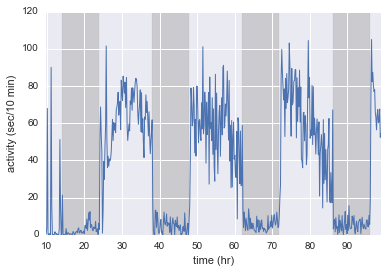

In [92]:
# Plot the results for non-overlapping ten minute intervals
fig, ax = plt.subplots()
ax = pretty_activity_plot(ax, 'fish', 2, 'activity', df1_10, lw=1, 
                          ylabel='activity (sec/10 min)')

In [93]:
# Save our new DataFrame to CSV file, using kwarg index=False to suppress
# writing of (trivial) indices
df_gt.to_csv('130315_genotypes.csv', index=False)
df1.to_csv('130315_1_minute_intervals.csv', index=False)
df1_10.to_csv('130315_10_minute_intervals.csv', index=False)